In [49]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [53]:
# matplotlib 한글 폰트 셋업
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fm.fontManager.addfont(fontpath)  # 에전의 rebuild 대신 이걸 추가해야 설치한 폰트 추가됨
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

plt.rc('axes', unicode_minus=False)  # Glyph 8722 방지용

fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


### 첨부용 result 테이블 구성

In [33]:
gov = "All"
tr = "TR1"
model = "dt"  # dt/rf/mlp
model_full = {"dt": "Tree", "rf": "RForest", "mlp": "MLP"}
model_full[model]

'Tree'

In [22]:
# 표 용 데이터 로드
# stay, change의 맞춘 개수, 틀린 개수 (change, stay 별로)
# 정확도, AUC 점수
# 모델별로 저장
# TR!, TR2 둘다

In [38]:
# 테스트

# predicted: 예측값
pred = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_predicted.csv", index_col=0)

# 케이스별 count
cnt = pred["Answer"].count()
change_t = pred.loc[(pred["Answer"] == 1) & (pred["Answer"] == pred[f"{model}_predict"]), "Answer"].count()
change_f = pred.loc[(pred["Answer"] == 1) & (pred["Answer"] != pred[f"{model}_predict"]), "Answer"].count()
stay_t = pred.loc[(pred["Answer"] == 0) & (pred["Answer"] == pred[f"{model}_predict"]), "Answer"].count()
stay_f = pred.loc[(pred["Answer"] == 0) & (pred["Answer"] != pred[f"{model}_predict"]), "Answer"].count()

print(cnt, change_t, change_f, stay_t, stay_f)

# score: 점수
score = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_score_result.csv", index_col=0)
acc, auc, bt_acc, bt_auc = score.loc[model_full[model], :].values
print(acc, auc, bt_acc, bt_auc)

# row
row = {}
row["gov"] = gov
row["model"] = model_full[model]
row["count"] = cnt
row["change_T"] = change_t
row["change_F"] = change_f
row["stay_T"] = stay_t
row["stay_F"] = stay_f
row["Acc"] = acc
row["ROC_AUC"] = auc
row["BT_Acc"] = bt_acc
row["BT_ROC_AUC"] = bt_auc

row

229 11 36 182 0
0.8427947598253275 0.6212298339957915 0.84 0.5663956639566397


{'gov': 'All',
 'model': 'Tree',
 'count': 229,
 'change_T': 11,
 'change_F': 36,
 'stay_T': 182,
 'stay_F': 0,
 'Acc': 0.8427947598253275,
 'ROC_AUC': 0.6212298339957915,
 'BT_Acc': 0.84,
 'BT_ROC_AUC': 0.5663956639566397}

In [44]:
# 반복문
model_full = {"dt": "Tree", "rf": "RForest", "mlp": "MLP"}

rows = []

for gov in ["All", '박승', '이성태', '김중수', '이주열', '이창용']:
    for model in ["dt", "rf", "mlp"]:
        for tr in ["TR1", "TR2"]:
            # predicted: 예측값
            pred = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_predicted.csv", index_col=0)

            # 
            cnt = pred["Answer"].count()
            change_t = pred.loc[(pred["Answer"] == 1) & (pred["Answer"] == pred[f"{model}_predict"]), "Answer"].count()
            change_f = pred.loc[(pred["Answer"] == 1) & (pred["Answer"] != pred[f"{model}_predict"]), "Answer"].count()
            stay_t = pred.loc[(pred["Answer"] == 0) & (pred["Answer"] == pred[f"{model}_predict"]), "Answer"].count()
            stay_f = pred.loc[(pred["Answer"] == 0) & (pred["Answer"] != pred[f"{model}_predict"]), "Answer"].count()


            # score: 점수
            score = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_score_result.csv", index_col=0)
            acc, auc, bt_acc, bt_auc = score.loc[model_full[model], :].values

            # row
            row = {}
            row["gov"] = gov
            row["model"] = model_full[model]
            row["tr"] = tr
            row["count"] = cnt
            row["change_T"] = change_t
            row["change_F"] = change_f
            row["stay_T"] = stay_t
            row["stay_F"] = stay_f
            row["Acc"] = acc
            row["ROC_AUC"] = auc
            row["BT_Acc"] = bt_acc
            row["BT_ROC_AUC"] = bt_auc
            rows.append(row)

table = pd.DataFrame(rows)
table.to_excel("model_result/result_table.xlsx", index=False)
table

,gov,model,tr,count,change_T,change_F,stay_T,stay_F,Acc,ROC_AUC,BT_Acc,BT_ROC_AUC
0,All,Tree,TR1,229,11,36,182,0,0.842795,0.621230,0.84,0.566396
1,All,Tree,TR2,223,12,34,175,2,0.838565,0.738762,0.76,0.852292
2,All,RForest,TR1,229,6,41,182,0,0.820961,0.912614,0.82,0.910569
3,All,RForest,TR2,223,0,46,177,0,0.793722,0.939388,0.62,0.950764
4,All,MLP,TR1,229,9,38,179,3,0.820961,0.718027,0.82,0.626016
5,All,MLP,TR2,223,0,46,177,0,0.793722,0.635225,0.62,0.667233
6,박승,Tree,TR1,48,4,4,40,0,0.916667,0.887500,0.94,0.812500
7,박승,Tree,TR2,42,4,3,35,0,0.928571,0.908163,0.88,0.931393
8,박승,RForest,TR1,48,3,5,40,0,0.895833,0.946875,0.92,0.891304
9,박승,RForest,TR2,42,3,4,35,0,0.904762,1.000000,0.86,1.000000


### ROC Curve 한번에 그리는 것

In [ ]:
# # plot - roc curve
# fper, tper, thresholds = roc_curve(y, pred_proba_y)
# plt.title("ROC Curve")
# plt.plot(fper, tper, color='red', label='ROC')
# plt.xlabel('1-TNR')
# plt.ylabel('Recall')
# if save_dir_plot:
#     plt.savefig(f"{save_dir_plot}/{title}_ROC_Curve.png", dpi=300)
# plt.close()  # 플롯 초기화(그림 출력 방지)

In [47]:
gov = "All"
tr = "TR1"
model = "dt"  # dt/rf/mlp
model_full = {"dt": "Tree", "rf": "RForest", "mlp": "MLP"}
model_full[model]

'Tree'

In [51]:
# predicted: 예측값
pred = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_predicted.csv", index_col=0)
y = pred["Answer"]
proba = pred[f"{model}_proba"]
pred

,Answer,dt_proba,dt_predict,rf_proba,rf_predict,mlp_proba,mlp_predict
date,,,,,,,
2002-04-04,0,0.166667,0,0.203490,0,0.091174,0
2002-05-07,1,0.166667,0,0.300566,0,0.105659,0
2002-06-05,0,0.166667,0,0.295283,0,0.109799,0
2002-07-04,0,0.166667,0,0.215374,0,0.109967,0
2002-08-06,0,0.166667,0,0.234239,0,0.095913,0
...,...,...,...,...,...,...,...
2022-11-24,1,1.000000,1,0.517142,1,0.683863,1
2023-01-13,1,0.166667,0,0.360065,0,0.591856,1
2023-02-23,0,0.166667,0,0.285401,0,0.607120,1


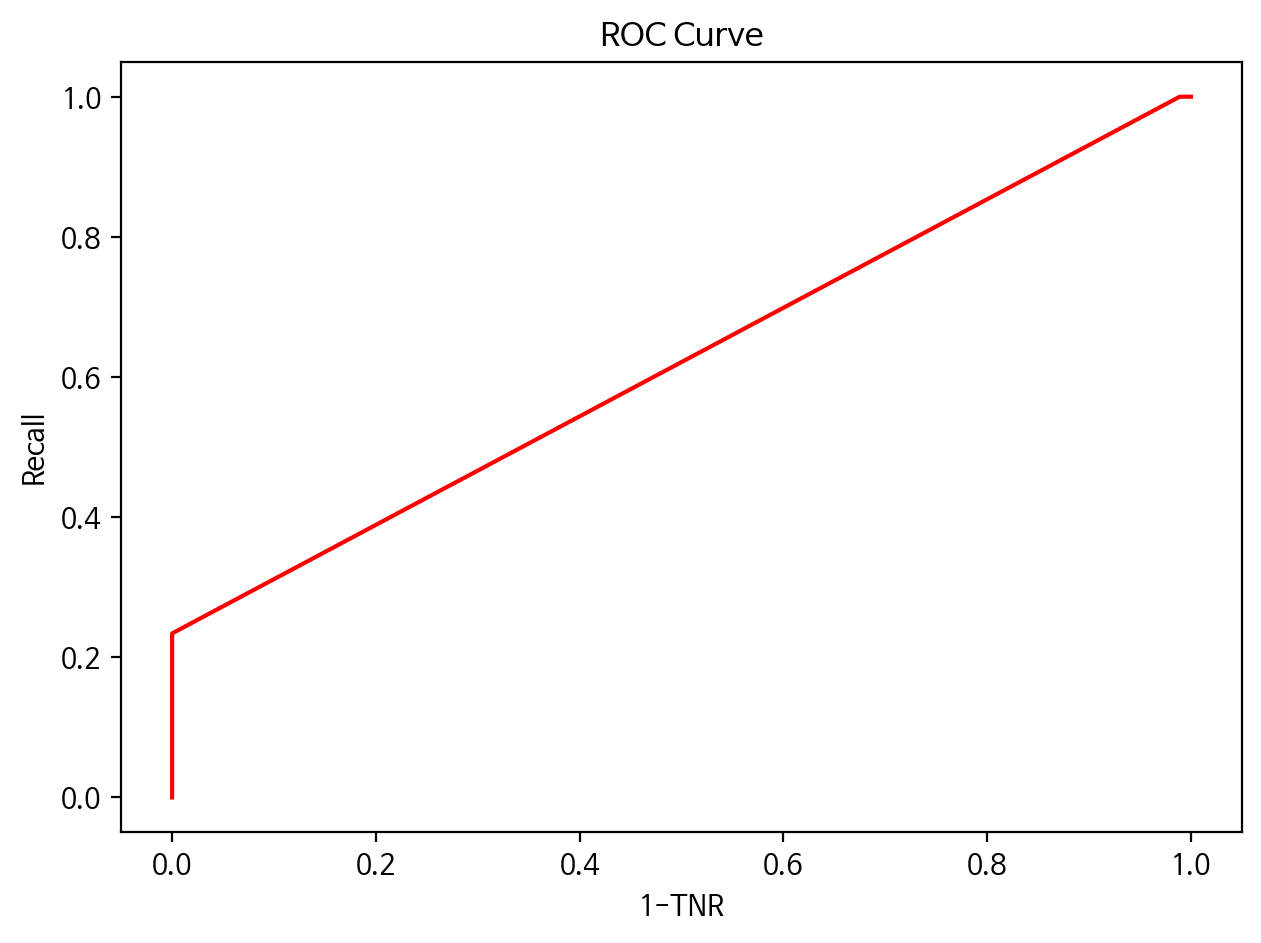

In [58]:
# plot - roc curve
fper, tper, thresholds = roc_curve(y, proba)
plt.title("ROC Curve")
plt.plot(fper, tper, color='red', label='ROC')
plt.xlabel('1-TNR')
plt.ylabel('Recall')
plt.tight_layout()
# if save_dir_plot:
#     plt.savefig(f"{save_dir_plot}/{title}_ROC_Curve.png", dpi=300)
# plt.close()  # 플롯 초기화(그림 출력 방지)
plt.show()

In [63]:
# 총재별로 그리기
model = "dt"
tr = "TR1"

plot_data = {}
for gov in ['박승', '이성태', '김중수', '이주열', '이창용']:
    pred = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_predicted.csv", index_col=0)
    y = pred["Answer"]
    proba = pred[f"{model}_proba"]
    
    # roc용 데이터 준비
    fper, tper, thresholds = roc_curve(y, proba)
    
    plot_data[gov] = {}
    plot_data[gov]["fper"] = fper
    plot_data[gov]["tper"] = tper
    
    
plot_data

{'박승': {'fper': array([0.  , 0.  , 0.45, 1.  ]),
  'tper': array([0. , 0.5, 1. , 1. ])},
 '이성태': {'fper': array([0.        , 0.        , 0.02631579, 0.92105263, 1.        ]),
  'tper': array([0. , 0.8, 0.9, 1. , 1. ])},
 '김중수': {'fper': array([0.        , 0.        , 0.12820513, 1.        ]),
  'tper': array([0.   , 0.5  , 0.875, 1.   ])},
 '이주열': {'fper': array([0.        , 0.        , 0.13114754, 0.91803279, 1.        ]),
  'tper': array([0.        , 0.2       , 0.66666667, 1.        , 1.        ])},
 '이창용': {'fper': array([0., 0., 1.]), 'tper': array([0., 1., 1.])}}

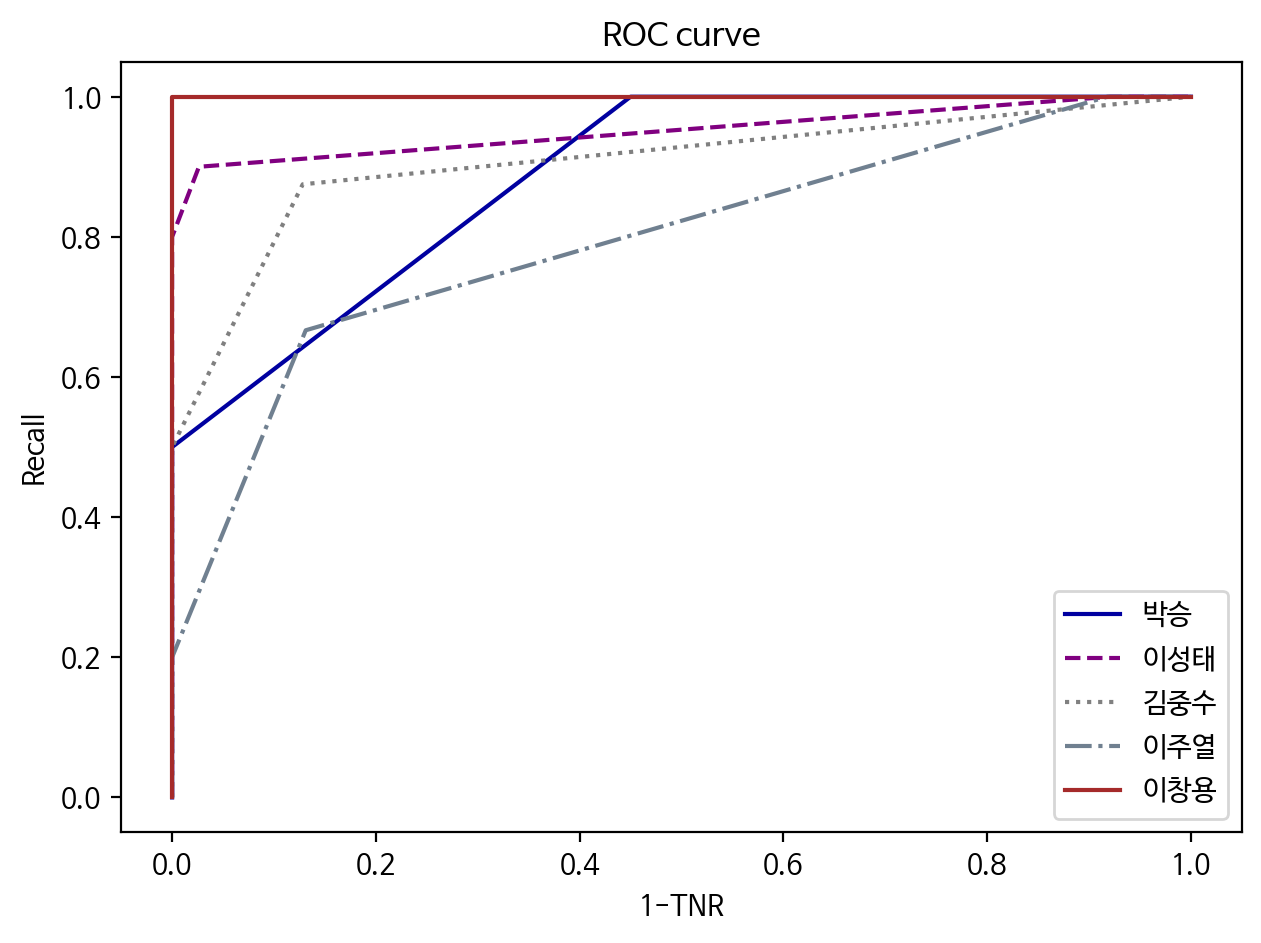

In [67]:
plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--') # 대각선

gov = "박승"
plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#0000A0', linestyle='-')

gov = "이성태"
plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#800080', linestyle='--')

gov = "김중수"
plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#808080', linestyle=':')

gov = "이주열"
plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#708090', linestyle='-.')

gov = "이창용"
plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#A52A2A', linestyle='-')

plt.xlabel('1-TNR')
plt.ylabel('Recall')
plt.title('ROC curve')
plt.legend(loc='best')
plt.tight_layout()

# Show the plot
plt.show()

In [69]:
# 반복문으로 전체 그리기

for model in ["dt", "rf", "mlp"]:
    for tr in ["TR1", "TR2"]:
        
        plot_data = {}
        for gov in ['박승', '이성태', '김중수', '이주열', '이창용']:
            pred = pd.read_csv(f"model_result/{gov}/{gov}_{tr}_predicted.csv", index_col=0)
            y = pred["Answer"]
            proba = pred[f"{model}_proba"]

            # roc용 데이터 준비
            fper, tper, thresholds = roc_curve(y, proba)

            plot_data[gov] = {}
            plot_data[gov]["fper"] = fper
            plot_data[gov]["tper"] = tper
            
            
        # plot
        plt.figure(1)

        gov = "박승"
        plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#0000A0', linestyle='-')

        gov = "이성태"
        plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#800080', linestyle='--')

        gov = "김중수"
        plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#808080', linestyle=':')

        gov = "이주열"
        plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#708090', linestyle='-.')

        gov = "이창용"
        plt.plot(plot_data[gov]["fper"], plot_data[gov]["tper"], label=f"{gov}", color='#A52A2A', linestyle='-')

        plt.xlabel('1-TNR')
        plt.ylabel('Recall')
        plt.title('ROC curve')
        plt.legend(loc='best')

        # save
        plt.tight_layout()
        plt.savefig(f"plot/plt_ROC-Curve_{model}_{tr}.png", dpi=200)
        plt.close()

### 총재, 비유사도 요약 테이블

In [70]:
bok_presidents = [
    ["박승", "2002-04-01", "2006-03-31"],
    ["이성태", "2006-04-01", "2010-03-31"],
    ["김중수", "2010-04-01", "2014-03-31"],
    ["이주열", "2014-04-01", "2022-03-31"],
    ["이창용", "2022-04-01", "-"],
]

In [73]:
df = pd.read_csv("./DATA/merged_data.csv", index_col=0)
df

,cosine_similarity,dissimilarity,base_rate,base_rate_diff,FFR,ko-us_gap,governor,president,tr1,tr2
1999-01-07,NaN,NaN,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-02-04,0.727940,0.272060,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-03-04,0.733303,0.266697,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-04-08,0.811213,0.188787,NaN,NaN,4.750,NaN,전철환,김대중,NaN,NaN
1999-05-06,0.759641,0.240359,4.75,NaN,4.750,0.000,전철환,김대중,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-11-24,0.917186,0.082814,3.25,1.0,3.875,-0.625,이창용,윤석열,7.225832,4.914102
2023-01-13,0.928007,0.071993,3.50,1.0,4.375,-0.875,이창용,윤석열,6.250150,1.879616
2023-02-23,0.926393,0.073607,3.50,0.0,4.625,-1.125,이창용,윤석열,6.250150,1.879616
2023-04-11,0.917157,0.082843,3.50,0.0,4.875,-1.375,이창용,윤석열,6.250150,1.879616


In [80]:
# 총재별 비유사도 통계량

rows = []
for gov, start, end in bok_presidents:
    temp = df.loc[df["governor"] == gov, "dissimilarity"]
    count = temp.count()
    dis_mean = temp.mean()
    dis_std = temp.std()
    
    temp = df.loc[(df["governor"] == gov) & (df["base_rate_diff"] == 1), "base_rate_diff"]
    change_count = temp.count()
    
    row = {}
    row["gov"] = gov
    row["start"] = start
    row["end"] = end
    row["N"] = count
    row["N_change"] = change_count
    row["mean"] = dis_mean
    row["std"] = dis_std
    rows.append(row)


In [83]:
table_gov = pd.DataFrame(rows)
table_gov.to_excel("model_result/gov_table.xlsx", index=False)
table_gov

,gov,start,end,N,N_change,mean,std
0,박승,2002-04-01,2006-03-31,48,8,0.248106,0.115079
1,이성태,2006-04-01,2010-03-31,48,10,0.121845,0.047171
2,김중수,2010-04-01,2014-03-31,47,8,0.080079,0.027385
3,이주열,2014-04-01,2022-03-31,76,14,0.070037,0.052004
4,이창용,2022-04-01,-,10,7,0.080285,0.013089
